<a href="https://colab.research.google.com/github/ritambharajha/Guidance_System_For_Retaliatory_Violence_Rochester_Using_NetworkAnalysis/blob/main/Dispute_Level_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> <center> Guidance System for Retaliatory Violence in Rochester using Network Analysis </center> </H1>
Advisor: Prof. Irshad Alteimer<br>
Team: Ritambhara Jha, Sreenidhi Sridhar, Carter Brazell


This file displays the generation of networks at dispute-level, each dispute  being a node. Edge is created when same suspects are involved in two disputes. Also, it displays the centrality scores.

In [ ]:
#Mounting the google drive to get access to the dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Updating to latest scipy library
pip install scipy==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing python libraries needed for the network analysis
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading the edge and node files
file_edge = "/content/drive/Shareddrives/CPSI Capstone Group/Excel_sheets/Edge_UniqueID.xlsx"
file_node = "/content/drive/Shareddrives/CPSI Capstone Group/Excel_sheets/Node_UniqueID.xlsx"
Gang_edges = pd.read_excel(file_edge)
Gang_nodes = pd.read_excel(file_node)

In [ ]:
#Displaying node data
Gang_nodes.head()

,MCAC ID,ID,Names,Suspect,Victim,Witness,Homicide,Assault Shooting,Menacing,Fights,Arson,Robbery,Intra-gang Fued,Domestic,Drugs/$/Prop,Romantic,Neighbor Dispute,Family Retaliation
0,10-010,1.0,Aaron Peterson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10-004,2.0,Aaron Radford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11-004,3.0,Aaron Young,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14-03,4.0,Abigail Hallowell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11-015,5.0,"Abram Cotton, Jr",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
#Displaying edge data
Gang_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MCAC ID             1384 non-null   object 
 1   ID                  1384 non-null   float64
 2   Names               1384 non-null   object 
 3   Suspect             1383 non-null   float64
 4   Victim              1383 non-null   float64
 5   Witness             1383 non-null   float64
 6   Homicide            1384 non-null   float64
 7   Assault Shooting    1384 non-null   float64
 8   Menacing            1384 non-null   float64
 9   Fights              1384 non-null   float64
 10  Arson               1384 non-null   float64
 11  Robbery             1384 non-null   float64
 12  Intra-gang Fued     1384 non-null   float64
 13  Domestic            1384 non-null   float64
 14  Drugs/$/Prop        1384 non-null   float64
 15  Romantic            1384 non-null   float64
 16  Neighb

In [ ]:
#Displays the object types of each column
data_types_dict = {'Robbery': int,'Homicide':int, 'Assault Shooting':int,'Menacing':int,'Fights':int,'Arson':int,'Intra-gang Fued':int,'Domestic':int,'Drugs/$/Prop':int,'Romantic':int,'Neighbor Dispute':int,'Family Retaliation':int}
Gang_nodes = Gang_nodes.astype(data_types_dict)
Gang_nodes.dtypes

MCAC ID                object
ID                    float64
Names                  object
Suspect               float64
Victim                float64
Witness               float64
Homicide                int64
Assault Shooting        int64
Menacing                int64
Fights                  int64
Arson                   int64
Robbery                 int64
Intra-gang Fued         int64
Domestic                int64
Drugs/$/Prop            int64
Romantic                int64
Neighbor Dispute        int64
Family Retaliation      int64
dtype: object

In [ ]:
#Displaying node data
Gang_nodes

,MCAC ID,ID,Names,Suspect,Victim,Witness,Homicide,Assault Shooting,Menacing,Fights,Arson,Robbery,Intra-gang Fued,Domestic,Drugs/$/Prop,Romantic,Neighbor Dispute,Family Retaliation
0,10-010,1.0,Aaron Peterson,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,10-004,2.0,Aaron Radford,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1
2,11-004,3.0,Aaron Young,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0
3,14-03,4.0,Abigail Hallowell,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,11-015,5.0,"Abram Cotton, Jr",0.0,1.0,0.0,0,0,1,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,11-036,1214.0,Zecheriah Burnett,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,0
1380,11-040,1215.0,Zeke Gross,1.0,0.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0
1381,13-022,1215.0,Zeke Gross,0.0,0.0,0.0,1,1,1,1,0,1,0,1,0,0,0,0
1382,13-028,1215.0,Zeke Gross,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Displaying edge data
Gang_edges

,MCAC ID,ID,Names
0,10-010,1,Aaron Peterson
1,10-004,2,Aaron Radford
2,11-004,3,Aaron Young
3,14-03,4,Abigail Hallowell
4,11-015,5,"Abram Cotton, Jr"
...,...,...,...
1379,11-036,1214,Zecheriah Burnett
1380,11-040,1215,Zeke Gross
1381,13-022,1215,Zeke Gross
1382,13-028,1215,Zeke Gross


In [ ]:
#Populating Graphs
G = nx.Graph()
dispute_dict = {} 

for index, row in Gang_nodes.iterrows():
  MCAC_ID = row['MCAC ID']
  ID = int(row['ID'])
  name = row['Names']
  Homicide = row['Homicide']
  Assault_Shooting = row['Assault Shooting']
  Menacing = row['Menacing']
  Fights = row['Fights']
  Arson = row['Arson']
  Robbery = row['Robbery']
  Intra_gang_Fued = row['Intra-gang Fued']
  Domestic = row['Domestic']
  Drugs = row['Drugs/$/Prop']
  Romantic = row['Romantic']
  Neighbor_Dispute = row['Neighbor Dispute']
  Family_Retaliation = row['Family Retaliation']
  # print(MCAC_ID, ID, name)

  if MCAC_ID not in G:
    G.add_node(MCAC_ID, MCAC_ID=MCAC_ID, ID=ID, name=name, Homicide=Homicide,Assault_Shooting=Assault_Shooting, Menacing=Menacing, 
               Fights=Fights, Arson=Arson,Robbery=Robbery,Intra_gang_Fued=Intra_gang_Fued, Domestic=Domestic, Drugs=Drugs , Romantic=Romantic, 
               Neighbor_Dispute=Neighbor_Dispute,Family_Retaliation=Family_Retaliation)

  if ID not in dispute_dict:
    dispute_dict[ID] = [MCAC_ID]
  else:
    dispute_dict[ID].append(MCAC_ID)

self_loops = False

for ID in dispute_dict:
  MCAC_IDs = dispute_dict[ID]
  edges = [(MCAC_IDs[i], MCAC_IDs[j], {'ID':ID}) for i in range(len(MCAC_IDs)) for j in range(i+(1-int(self_loops)),len(MCAC_IDs))]
  G.add_edges_from(edges)
  

In [ ]:
#Displaying node attributes
for node in G.nodes(data=True):
  print(node)

('10-010', {'MCAC_ID': '10-010', 'ID': 1, 'name': 'Aaron Peterson', 'Homicide': 0, 'Assault_Shooting': 0, 'Menacing': 0, 'Fights': 0, 'Arson': 0, 'Robbery': 0, 'Intra_gang_Fued': 0, 'Domestic': 0, 'Drugs': 0, 'Romantic': 0, 'Neighbor_Dispute': 0, 'Family_Retaliation': 0})
('10-004', {'MCAC_ID': '10-004', 'ID': 2, 'name': 'Aaron Radford', 'Homicide': 0, 'Assault_Shooting': 0, 'Menacing': 0, 'Fights': 0, 'Arson': 0, 'Robbery': 1, 'Intra_gang_Fued': 0, 'Domestic': 0, 'Drugs': 0, 'Romantic': 0, 'Neighbor_Dispute': 0, 'Family_Retaliation': 1})
('11-004', {'MCAC_ID': '11-004', 'ID': 3, 'name': 'Aaron Young', 'Homicide': 0, 'Assault_Shooting': 1, 'Menacing': 0, 'Fights': 0, 'Arson': 0, 'Robbery': 0, 'Intra_gang_Fued': 0, 'Domestic': 0, 'Drugs': 0, 'Romantic': 0, 'Neighbor_Dispute': 0, 'Family_Retaliation': 0})
('14-03', {'MCAC_ID': '14-03', 'ID': 4, 'name': 'Abigail Hallowell', 'Homicide': 0, 'Assault_Shooting': 0, 'Menacing': 0, 'Fights': 0, 'Arson': 0, 'Robbery': 0, 'Intra_gang_Fued': 0, 'D

In [ ]:
#Displaying edge attributes
for edge in G.edges(data=True):
  print(edge)

('10-010', '10-021', {'ID': 13})
('10-010', '10-038', {'ID': 902})
('10-010', '13-028', {'ID': 306})
('10-010', '12-021', {'ID': 329})
('10-010', '13-034', {'ID': 625})
('10-010', '13-009', {'ID': 634})
('10-010', '10-024', {'ID': 902})
('11-004', '10-005', {'ID': 464})
('11-004', '14-28', {'ID': 464})
('11-004', '11-036', {'ID': 1214})
('11-004', '10-021', {'ID': 351})
('11-004', '11-025', {'ID': 1165})
('11-004', '12-014', {'ID': 1086})
('11-004', '14-39', {'ID': 458})
('11-004', '11-045', {'ID': 712})
('11-004', '12-037', {'ID': 929})
('11-004', '12-019', {'ID': 1165})
('11-015', '14-11', {'ID': 888})
('11-015', '12-032', {'ID': 895})
('10-033', '12-030', {'ID': 360})
('10-033', '13-003', {'ID': 200})
('10-033', '10-049', {'ID': 42})
('10-033', '12-004', {'ID': 865})
('10-033', '13-008', {'ID': 55})
('10-033', '10-016', {'ID': 243})
('10-033', '10-042', {'ID': 1210})
('10-033', '10-050', {'ID': 509})
('10-033', '13-045', {'ID': 990})
('10-033', '14-21', {'ID': 535})
('10-033', '14-3

In [ ]:
#Creating empty list for node colors
node_color = []


# for each node in the graph
for node in G.nodes(data=True):

    # if the node has the attribute group1
    if node[1]['Homicide']==1:
        node_color.append('blue')

    # if the node has the attribute group1
    elif node[1]['Assault_Shooting']==1:
        node_color.append('red')

    # if the node has the attribute group1
    elif node[1]['Menacing']==1:
        node_color.append('green')

    # if the node has the attribute group1
    elif node[1]['Fights']==1:
        node_color.append('yellow')

    # if the node has the attribute group1
    elif node[1]['Arson']==1:
        node_color.append('orange')  

    elif node[1]['Robbery']==1:
        node_color.append('olive')  

    elif node[1]['Intra_gang_Fued']==1:
        node_color.append('purple')  

    elif node[1]['Domestic']==1:
        node_color.append('pink')  

    elif node[1]['Drugs']==1:
        node_color.append('black')  

    elif node[1]['Romantic']==1:
        node_color.append('grey')  

    elif node[1]['Neighbor_Dispute']==1:
        node_color.append('brown')  

    # else node[1]['Family_Retaliation']==1:
    else:
        node_color.append('teal')  

# draw graph with node attribute color
# nx.draw(G, with_labels=False, node_size=25, node_color=node_color)

<ipython-input-58-d55e781bfff7>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formant" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("Initial_network_dispute.png", formant="PNG", dpi=300)


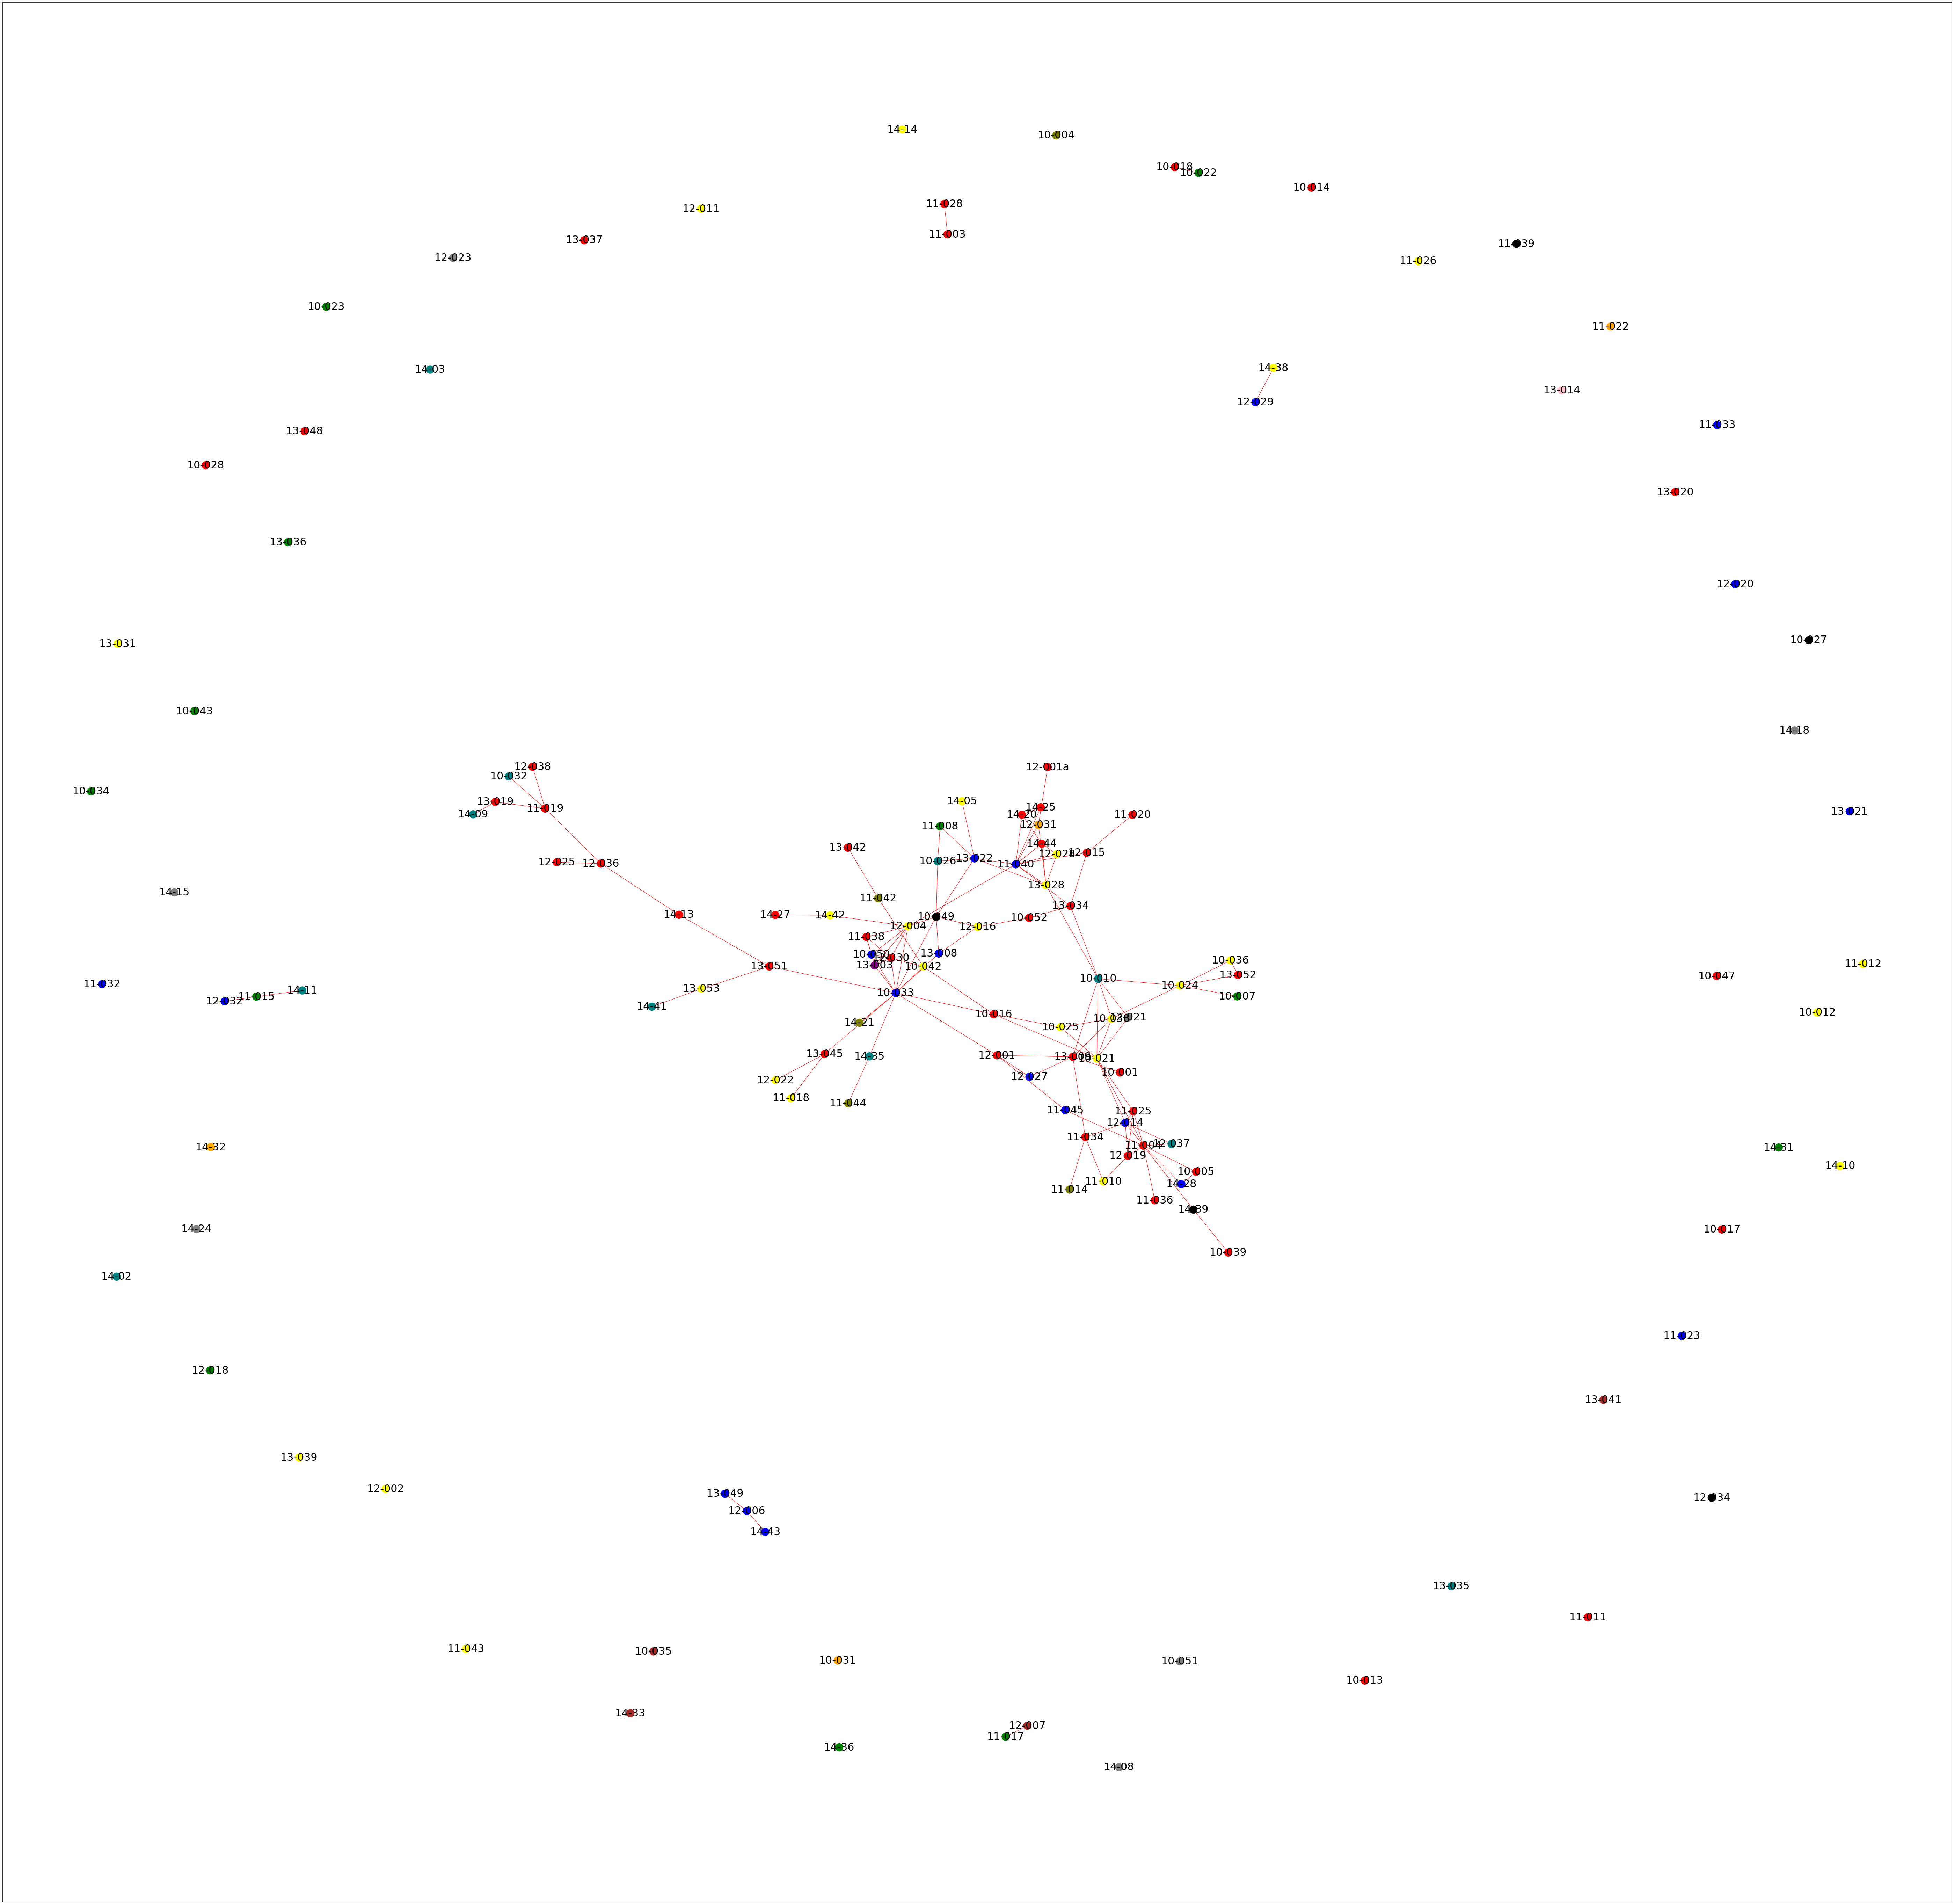

In [ ]:
#plotting general network with spring layout.
pos = nx.spring_layout(G) #positions for all nodes
plt.figure(figsize=(100,100))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=500, node_color=node_color)
nx.draw_networkx_labels(G,pos=pos,font_size=30) #to label the nodes with Id
plt.savefig("Initial_network_dispute.png", formant="PNG", dpi=300)
plt.show()

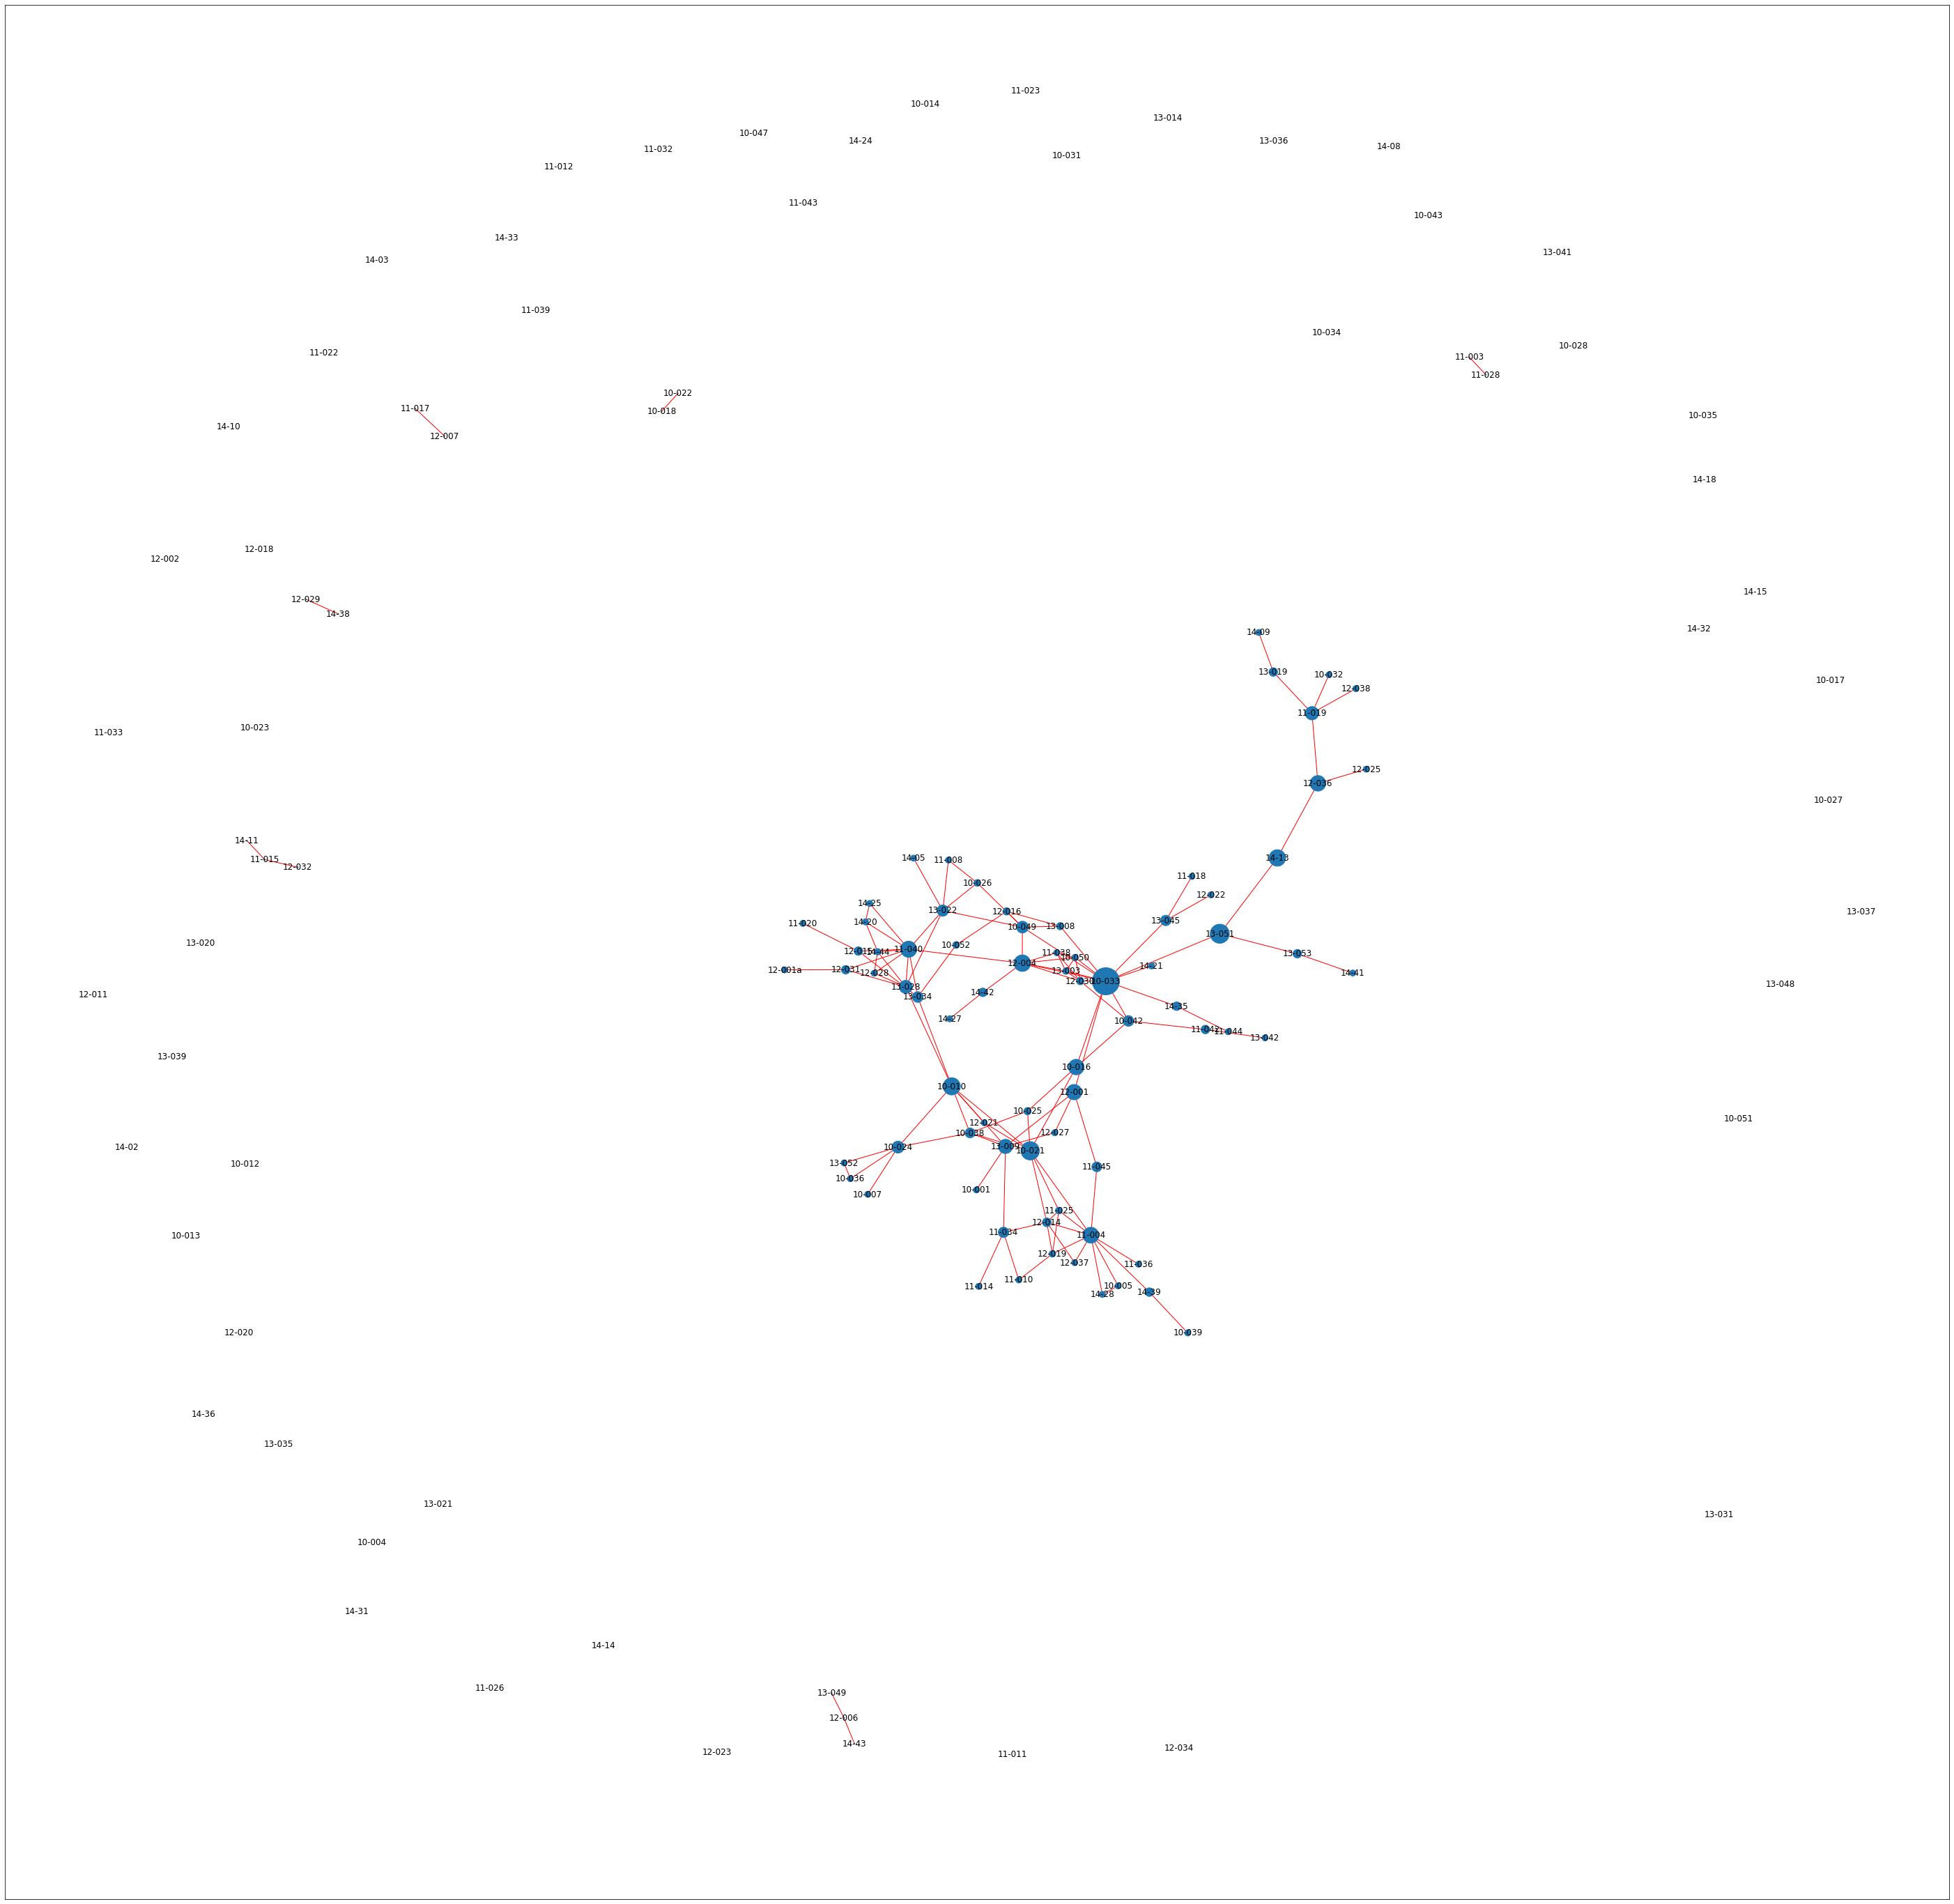

In [ ]:
#Betweeness Centrality
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betCent.values()]
pos = nx.spring_layout(G) #positions for all nodes
#pos = nx.circular_layout(G) #positions for all nodes
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Betweeness.png", formant="PNG", dpi=300)
plt.show()

In [ ]:
#Printing node and their respective betweenness centrality value
print(sorted(([f"{node} {betCent[node]:f}" for node in betCent])))

['10-001 0.007605', '10-004 0.000000', '10-005 0.007605', '10-007 0.007605', '10-010 0.061054', '10-012 0.000000', '10-013 0.000000', '10-014 0.000000', '10-016 0.049694', '10-017 0.000000', '10-018 0.000103', '10-021 0.069524', '10-022 0.000103', '10-023 0.000000', '10-024 0.029702', '10-025 0.011029', '10-026 0.009347', '10-027 0.000000', '10-028 0.000000', '10-031 0.000000', '10-032 0.007605', '10-033 0.151789', '10-034 0.000000', '10-035 0.000000', '10-036 0.007605', '10-038 0.020095', '10-039 0.007605', '10-042 0.023419', '10-043 0.000000', '10-047 0.000000', '10-049 0.028749', '10-050 0.008611', '10-051 0.000000', '10-052 0.009563', '11-003 0.000103', '11-004 0.052124', '11-008 0.007605', '11-010 0.007845', '11-011 0.000000', '11-012 0.000000', '11-014 0.007605', '11-015 0.000308', '11-017 0.000103', '11-018 0.007605', '11-019 0.036896', '11-020 0.007605', '11-022 0.000000', '11-023 0.000000', '11-025 0.009475', '11-026 0.000000', '11-028 0.000103', '11-032 0.000000', '11-033 0.0

In [ ]:
#Copying the values to an excel sheet
data_betCent = [f"{node} {betCent[node]:f}" for node in betCent]
df_betCent = pd.DataFrame(data_betCent, columns=['Score'])
df_betCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/betCent_dispute.xlsx")

In [ ]:
#sorted(betCent, key=betCent.get, reverse=True)

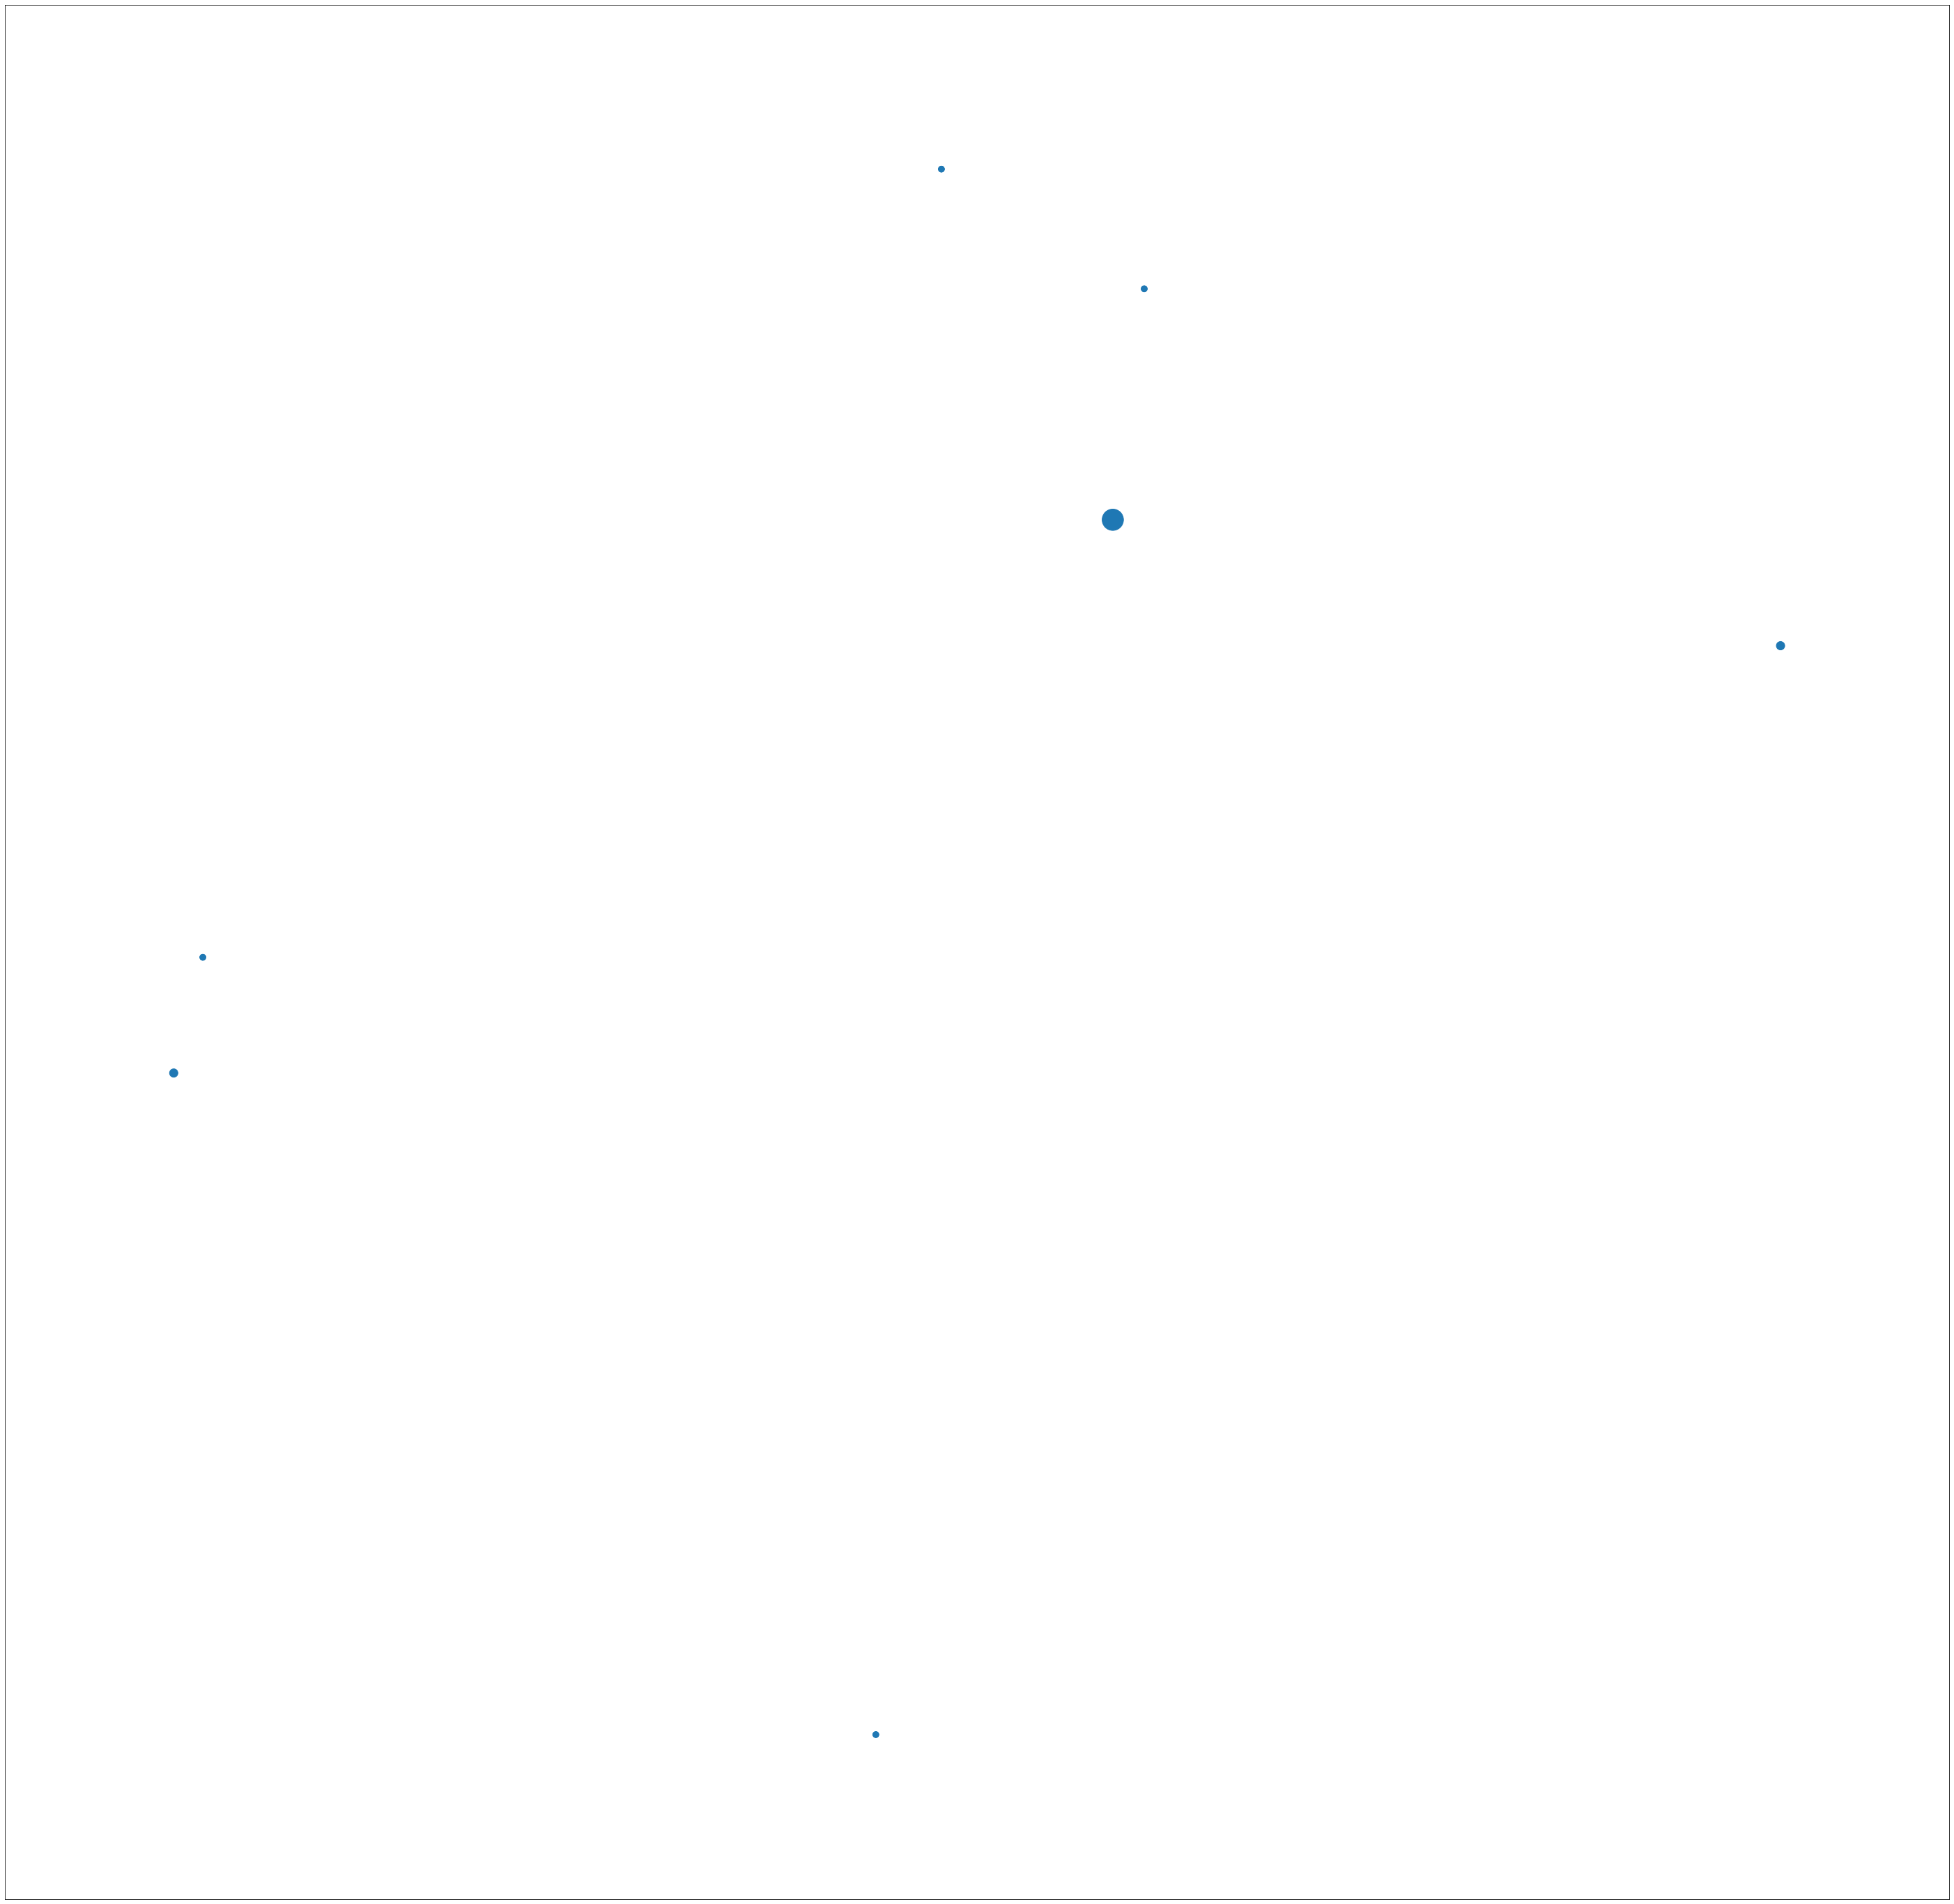

In [ ]:
#Degree Centrality
pos = nx.spectral_layout(G)
degCent = nx.degree_centrality(G)
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Degree.png", formant="PNG", dpi=300) 
plt.show()

In [ ]:
#Printing node and their respective degree centrality value
print(sorted([f"{node} {degCent[node]:f}" for node in degCent]))

['10-001 0.007194', '10-004 0.000000', '10-005 0.014388', '10-007 0.007194', '10-010 0.050360', '10-012 0.000000', '10-013 0.000000', '10-014 0.000000', '10-016 0.028777', '10-017 0.000000', '10-018 0.007194', '10-021 0.057554', '10-022 0.007194', '10-023 0.000000', '10-024 0.035971', '10-025 0.021583', '10-026 0.021583', '10-027 0.000000', '10-028 0.000000', '10-031 0.000000', '10-032 0.007194', '10-033 0.093525', '10-034 0.000000', '10-035 0.000000', '10-036 0.014388', '10-038 0.035971', '10-039 0.007194', '10-042 0.028777', '10-043 0.000000', '10-047 0.000000', '10-049 0.043165', '10-050 0.035971', '10-051 0.000000', '10-052 0.014388', '11-003 0.007194', '11-004 0.071942', '11-008 0.014388', '11-010 0.014388', '11-011 0.000000', '11-012 0.000000', '11-014 0.007194', '11-015 0.014388', '11-017 0.007194', '11-018 0.007194', '11-019 0.028777', '11-020 0.007194', '11-022 0.000000', '11-023 0.000000', '11-025 0.028777', '11-026 0.000000', '11-028 0.007194', '11-032 0.000000', '11-033 0.0

In [ ]:
#Copying the values to an excel sheet
data_degCent = [f"{node} {degCent[node]:f}" for node in degCent]
df_degCent = pd.DataFrame(data_degCent, columns=['Score'])
df_degCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/degCent_dispute.xlsx")

In [ ]:
#sorted(degCent, key=degCent.get, reverse=True)

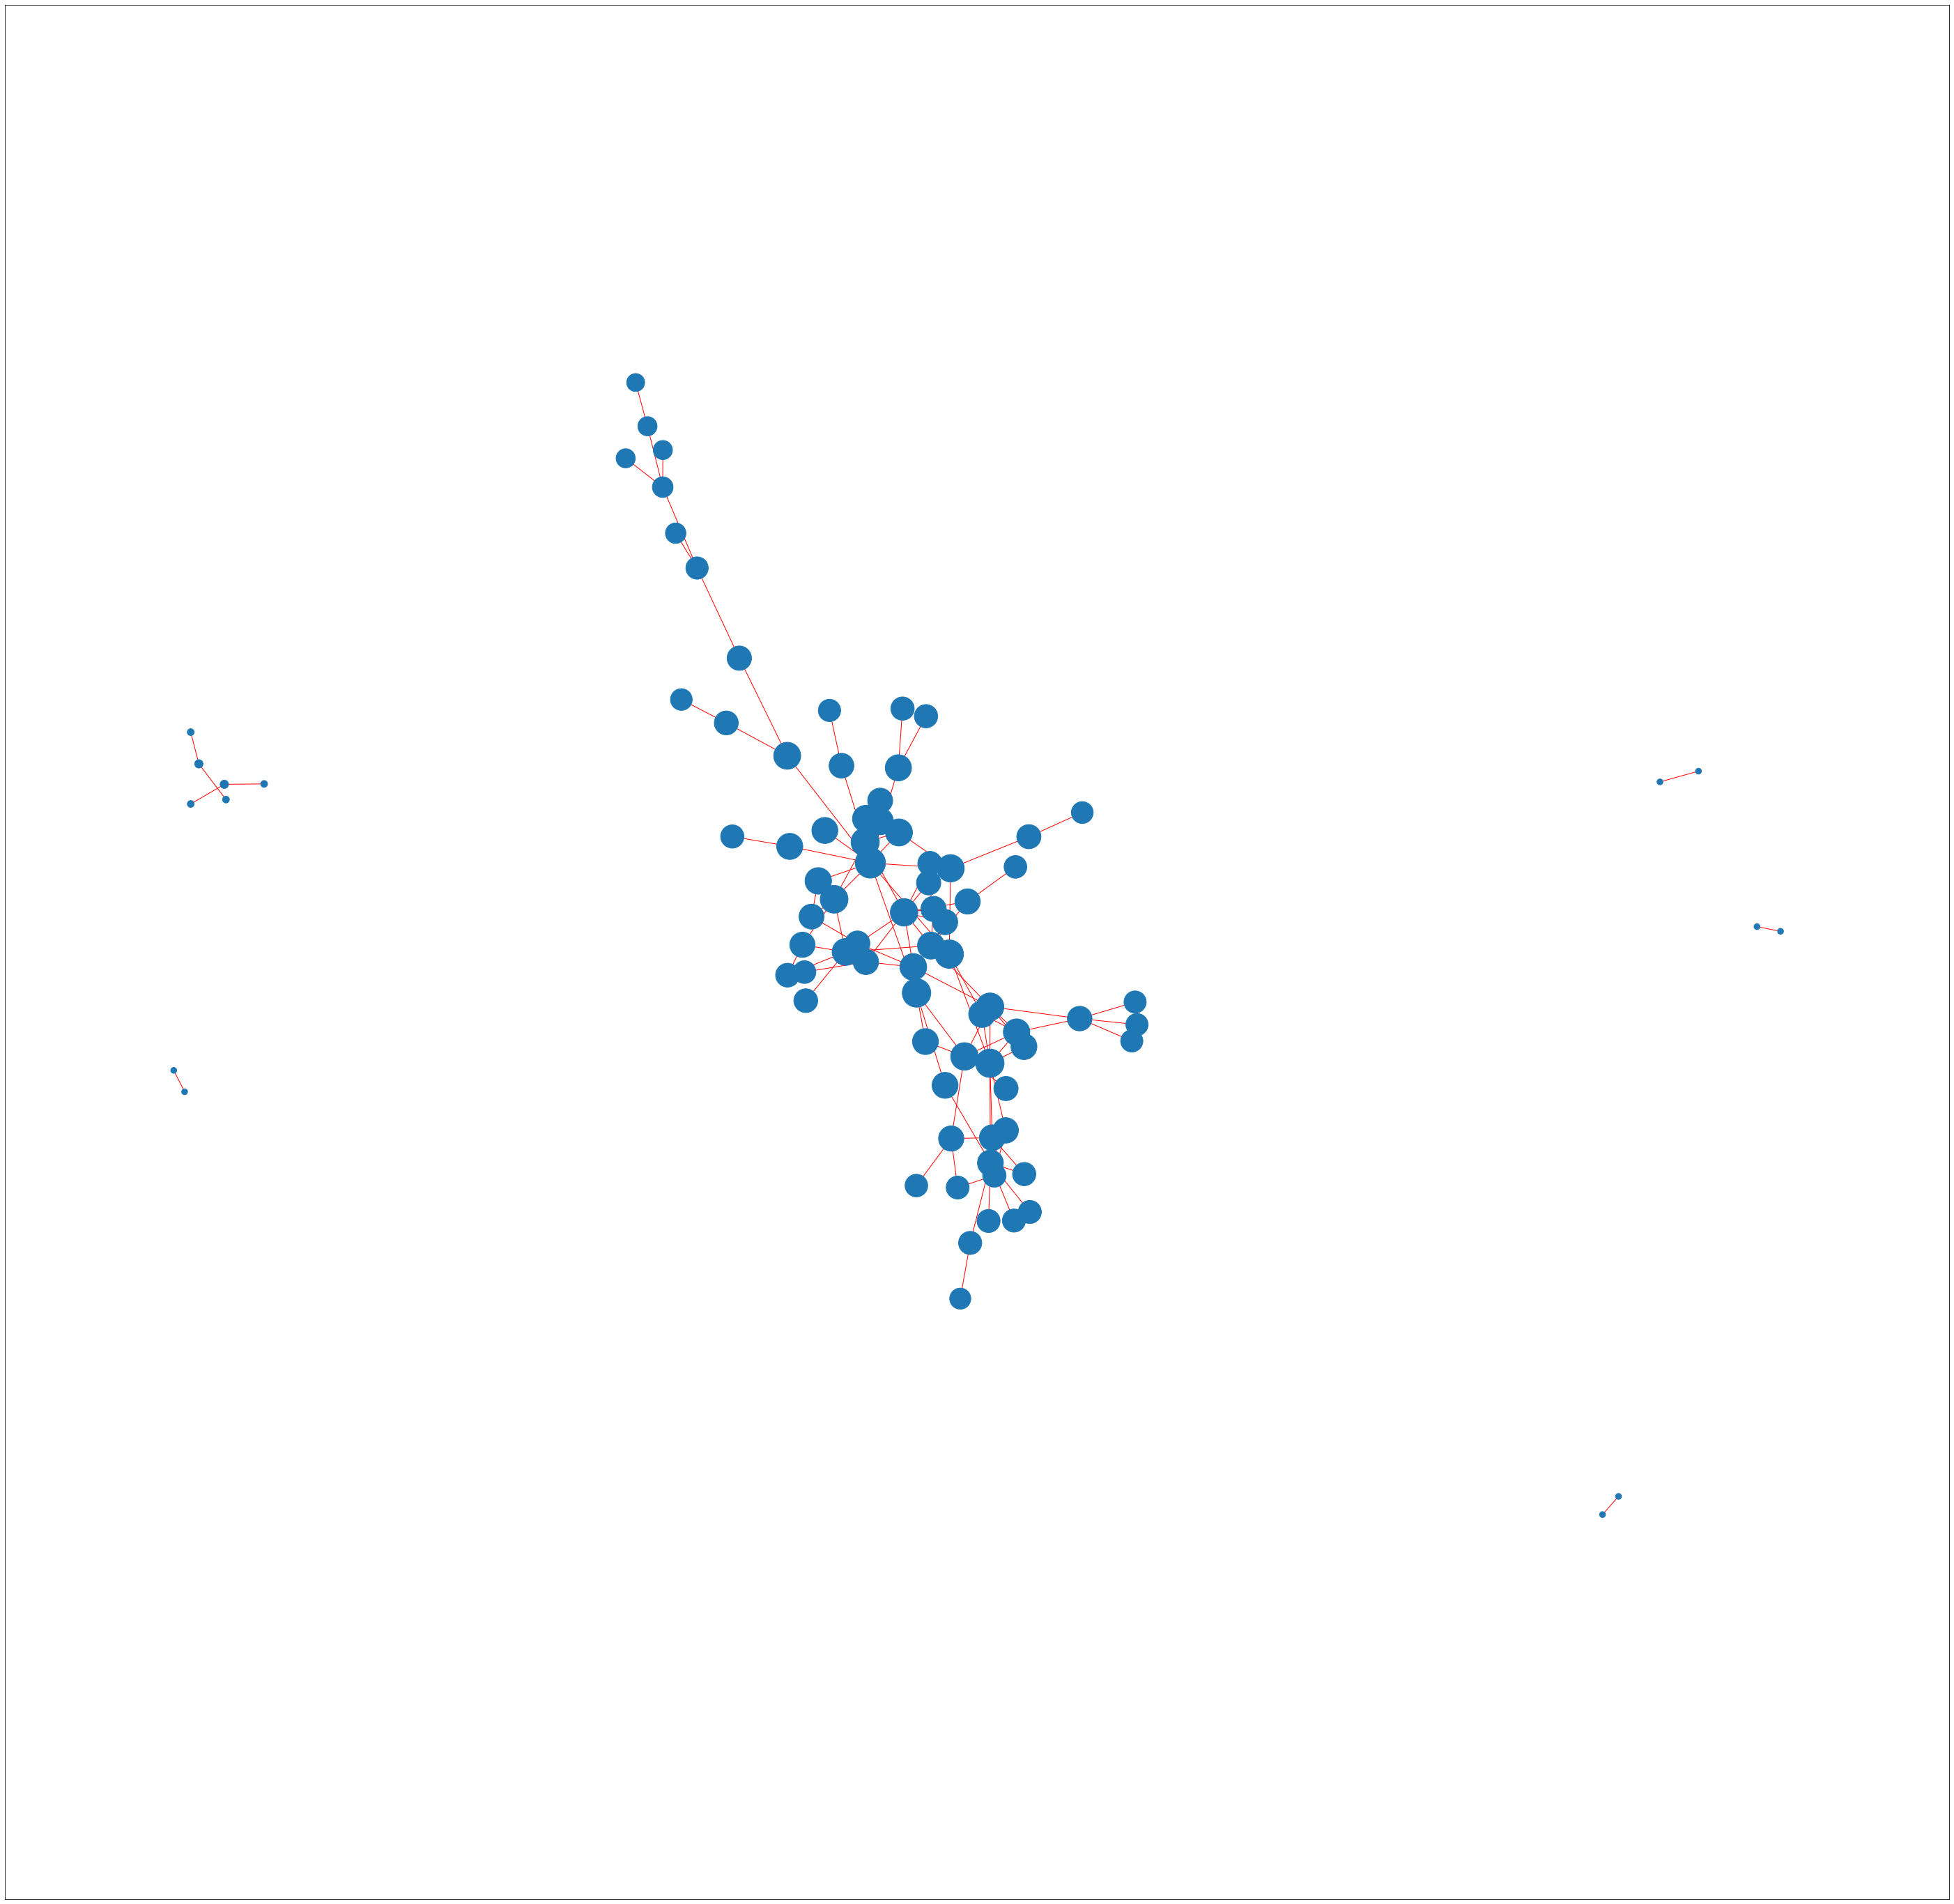

In [ ]:
#Closeness Centrality
pos = nx.spring_layout(G)
cloCent = nx.closeness_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Closeness.png", formant="PNG", dpi=300)
plt.show()

In [ ]:
#Printing node and their respective closeness centrality value
print(sorted([f"{node} {cloCent[node]:f}" for node in cloCent]))

['10-001 0.121217', '10-004 0.000000', '10-005 0.110352', '10-007 0.101535', '10-010 0.157583', '10-012 0.000000', '10-013 0.000000', '10-014 0.000000', '10-016 0.166931', '10-017 0.000000', '10-018 0.007194', '10-021 0.166227', '10-022 0.007194', '10-023 0.000000', '10-024 0.125066', '10-025 0.146999', '10-026 0.131758', '10-027 0.000000', '10-028 0.000000', '10-031 0.000000', '10-032 0.075761', '10-033 0.188496', '10-034 0.000000', '10-035 0.000000', '10-036 0.101798', '10-038 0.144837', '10-039 0.091831', '10-042 0.153889', '10-043 0.000000', '10-047 0.000000', '10-049 0.158854', '10-050 0.149226', '10-051 0.000000', '10-052 0.126674', '11-003 0.007194', '11-004 0.138230', '11-008 0.117249', '11-010 0.108828', '11-011 0.000000', '11-012 0.000000', '11-014 0.105902', '11-015 0.014388', '11-017 0.007194', '11-018 0.112238', '11-019 0.088134', '11-020 0.106763', '11-022 0.000000', '11-023 0.000000', '11-025 0.133999', '11-026 0.000000', '11-028 0.007194', '11-032 0.000000', '11-033 0.0

In [ ]:
#Copying the values to an excel sheet
data_cloCent = [f"{node} {cloCent[node]:f}" for node in cloCent]
df_cloCent = pd.DataFrame(data_cloCent, columns=['Score'])
df_cloCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/cloCent_dispute.xlsx")

In [ ]:
# sorted(cloCent, key=cloCent.get, reverse=True)

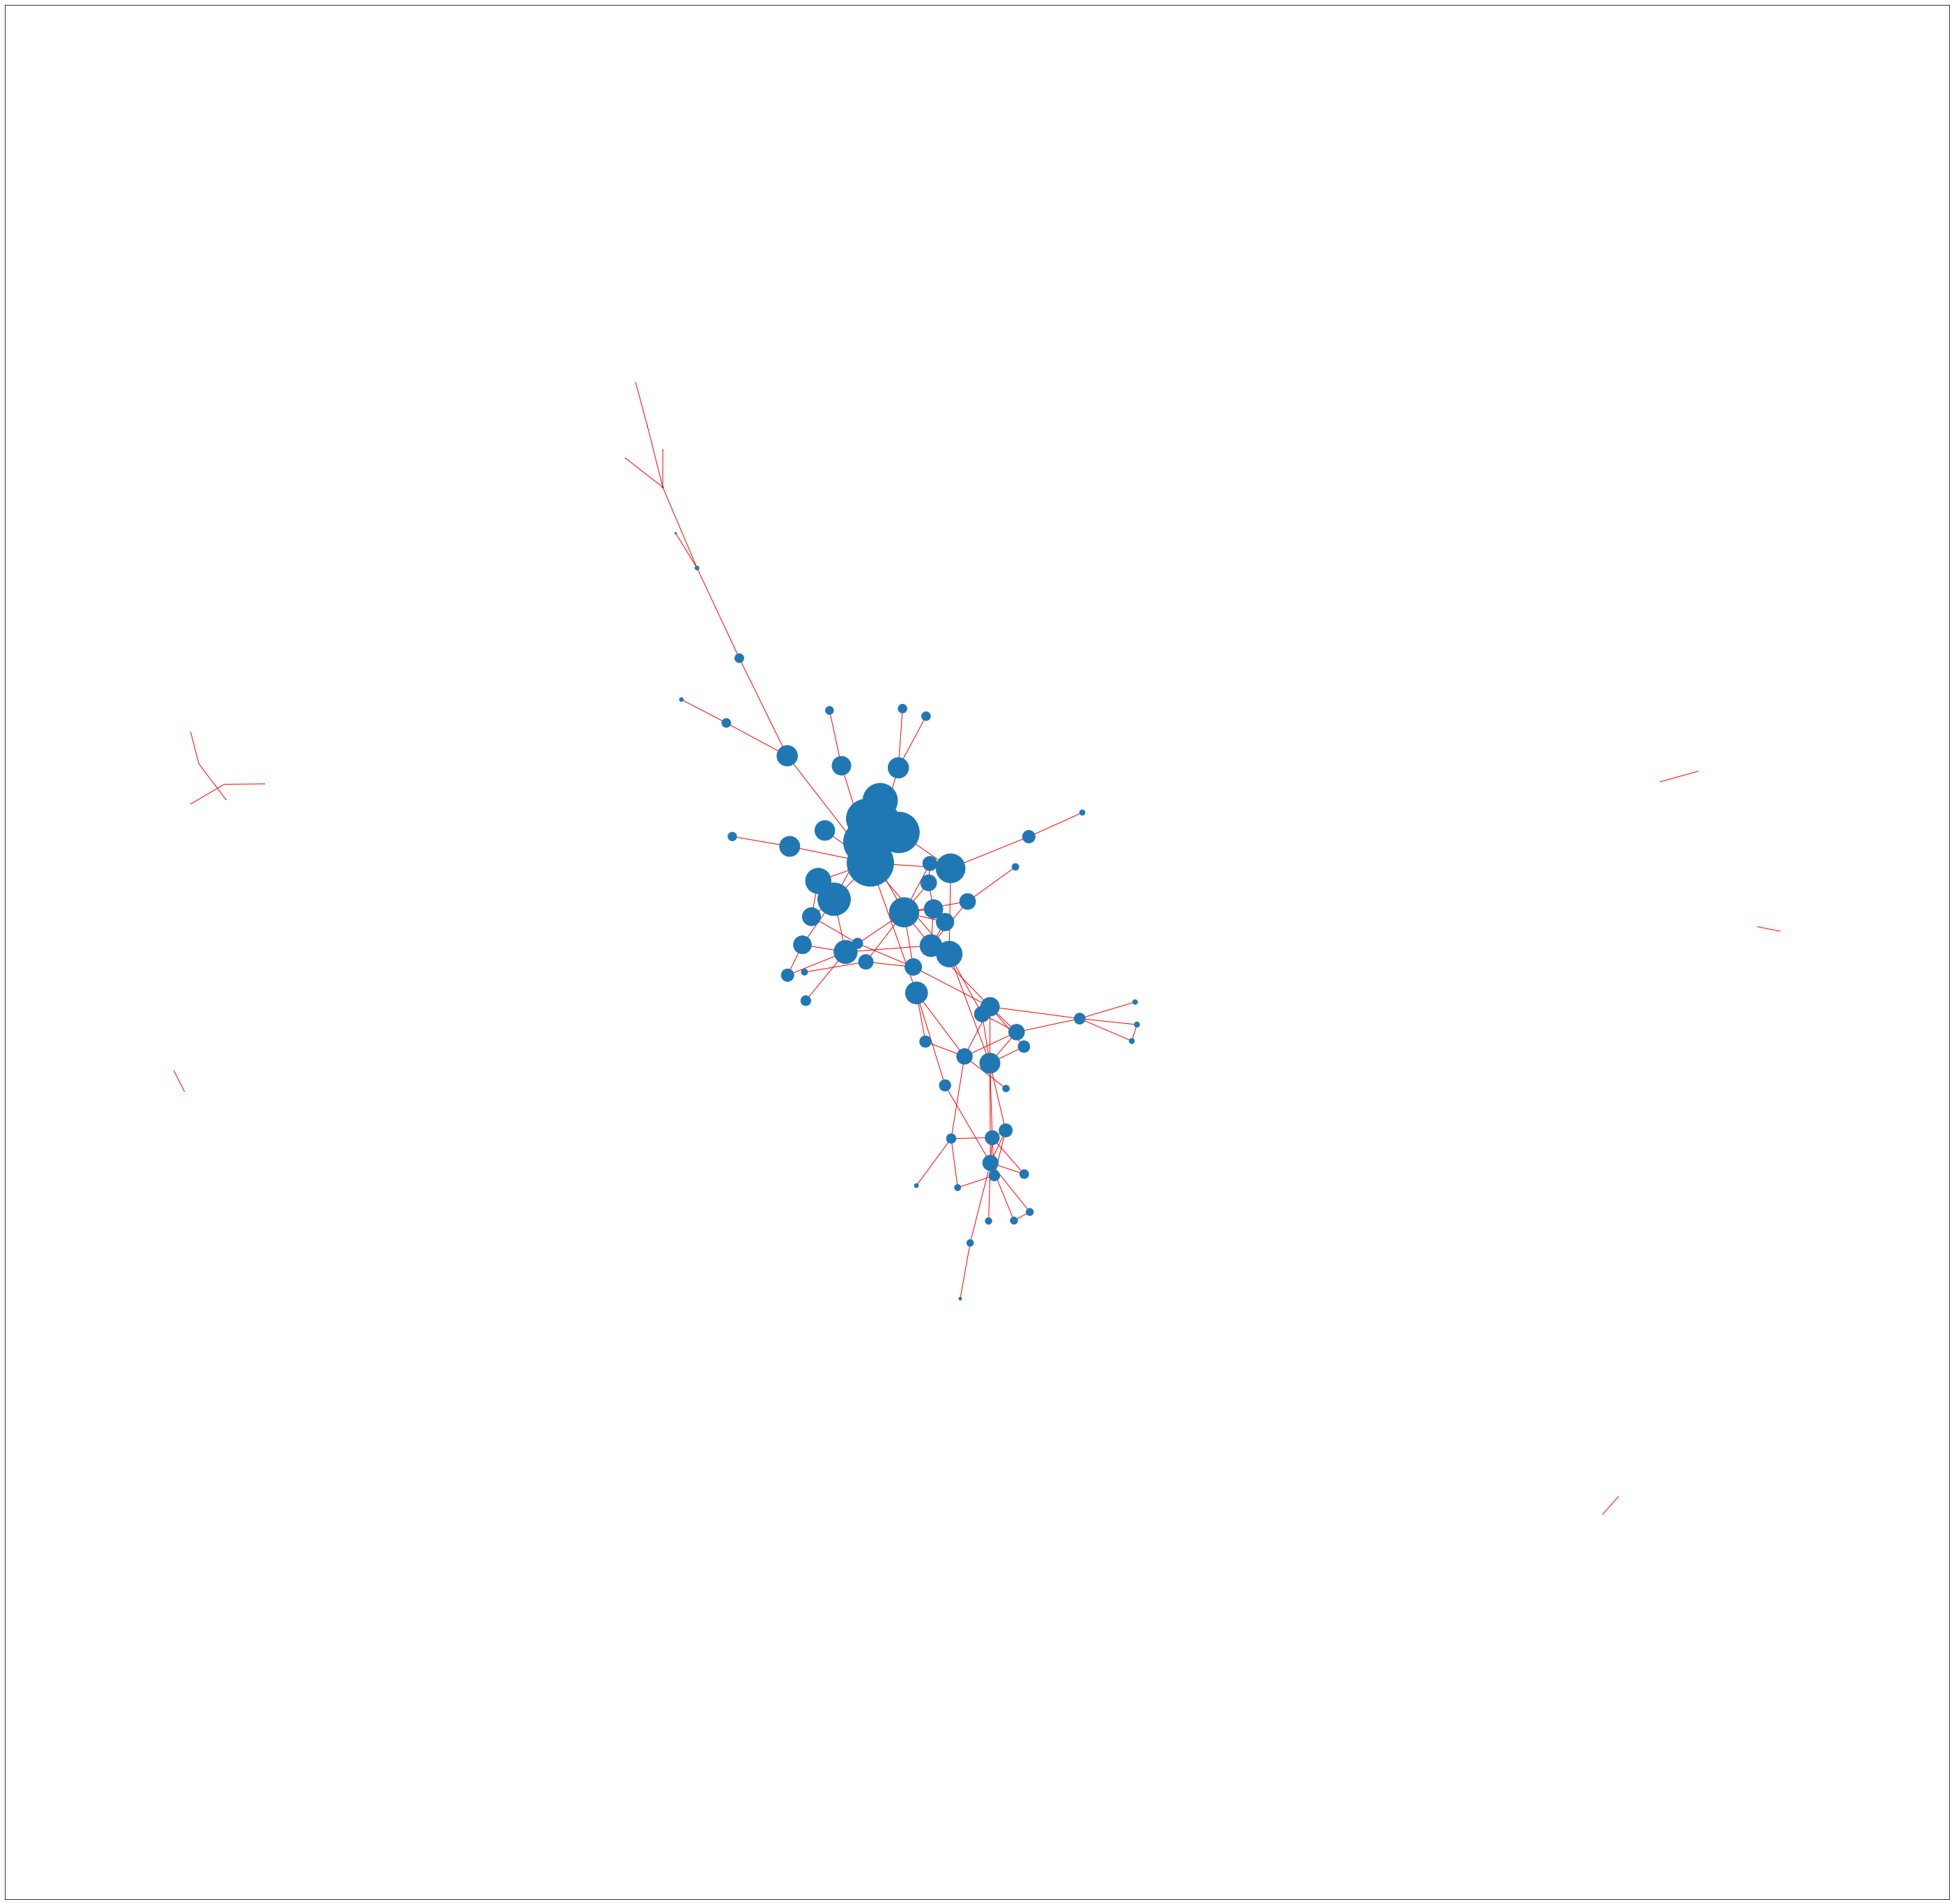

In [ ]:
#Eigen Vector Centrality
eigCent = nx.eigenvector_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Eigen.png", formant="PNG", dpi=300) 
plt.show()

In [ ]:
#Printing node and their respective Eigen Vector centrality value
print(sorted([f"{node} {eigCent[node]:f}" for node in eigCent]))

['10-001 0.009117', '10-004 0.000000', '10-005 0.010770', '10-007 0.004541', '10-010 0.071588', '10-012 0.000000', '10-013 0.000000', '10-014 0.000000', '10-016 0.136377', '10-017 0.000000', '10-018 0.000000', '10-021 0.083773', '10-022 0.000000', '10-023 0.000000', '10-024 0.025031', '10-025 0.049143', '10-026 0.065909', '10-027 0.000000', '10-028 0.000000', '10-031 0.000000', '10-032 0.000116', '10-033 0.445599', '10-034 0.000000', '10-035 0.000000', '10-036 0.005547', '10-038 0.050757', '10-039 0.001654', '10-042 0.173337', '10-043 0.000000', '10-047 0.000000', '10-049 0.219627', '10-050 0.314533', '10-051 0.000000', '10-052 0.022754', '11-003 0.000000', '11-004 0.048593', '11-008 0.032189', '11-010 0.007775', '11-011 0.000000', '11-012 0.000000', '11-014 0.003379', '11-015 0.000000', '11-017 0.000000', '11-018 0.015693', '11-019 0.000641', '11-020 0.007999', '11-022 0.000000', '11-023 0.000000', '11-025 0.035895', '11-026 0.000000', '11-028 0.000000', '11-032 0.000000', '11-033 0.0

In [ ]:
#Copying the values to an excel sheet
data_eigCent = [f"{node} {eigCent[node]:f}" for node in eigCent]
df_eigCent = pd.DataFrame(data_eigCent, columns=['Score'])
df_eigCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/eigCent_dispute.xlsx")

In [ ]:
# sorted(eigCent, key=eigCent.get, reverse=True)

We have collected the data from Rochester Police Department. Here we have populated a general network and calculated the centrality scores for all the data points.<br>
In the future we will be working on the modeling and prediction phase. With the help of the collected matrix we will construct an appropriate model to identify the perpetrator of the violence in the test set.